In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.filters as flt
import skimage.io as io
import skimage.transform as transform

In [ ]:
img = io.imread('../../../TestData/2D/png/fork.png')[50:100,:,0]/255.0
plt.imshow(img)


In [ ]:
thickness = 0.2 # mm
sigma = 2.5
img = np.exp(-img*thickness*sigma)

In [ ]:
plt.imshow(img)
plt.colorbar()

In [ ]:
plt.imshow(flt.sobel(img))

In [ ]:
simg=flt.sobel(img)
plt.figure(figsize=[10,12])
plt.imshow(0<simg)

# Line angles through line fits
Create segmented lines

In [ ]:
from skimage.measure import label, regionprops

In [ ]:
simg=flt.sobel(img)
plt.figure(figsize=[10,12])
bimg=0<simg
limg=label(bimg)
plt.imshow(limg)

In [ ]:
def lineAngle(img,lbl) :
    pos=np.argwhere(img==lbl)
    A = np.vstack([pos[:,0], np.ones(pos.shape[0])]).T
    y=pos[:,1]
    c,m = np.linalg.lstsq(A,y)[0]
    return np.arctan(c)/np.pi*180

In [ ]:
for i in np.arange(1,5) :
    print(lineAngle(limg,i))

## Tilted axis test

In [ ]:
a = transform.rotate(simg,5.0)[20:80,:]
la = label(0<a)
b = a[:,-1::-1]
lb = label(0<b)
fig,ax = plt.subplots(1,2,figsize = (12,5))
ax[0].imshow(la)
ax[1].imshow(lb)


In [41]:
sa = []
for i in np.arange(1,5) :
    sa.append(lineAngle(la,i))
    
sb = []
for i in np.arange(1,5) :
    sb.append(lineAngle(lb,i))


/Users/kaestner/opt/anaconda3/envs/py35/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


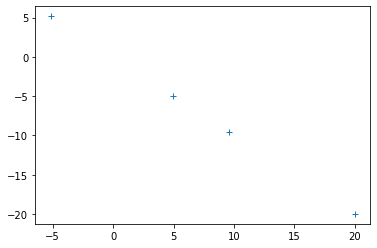

In [42]:
plt.plot(sa,sb[-1::-1],"+")